In [1]:
pip install cvxportfolio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.9/352.9 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.2 MB/s eta 0:00:00


In [2]:
UNIVERSE = ['AAV.BK',
 'ACE.BK',
 'ADVANC.BK',
 'AMATA.BK',
 'AOT.BK',
 'AP.BK',
 'BANPU.BK',
 'BBL.BK',
 'BCH.BK',
 'BCP.BK',
 'BCPG.BK',
 'BDMS.BK',
 'BEM.BK',
 'BGRIM.BK',
 'BH.BK',
 'BJC.BK',
 'BLA.BK',
 'BSET100.BK',
 'BTS.BK',
 'CBG.BK',
 'CENTEL.BK',
 'CHG.BK',
 'CK.BK',
 'CKP.BK',
 'COM7.BK',
 'CPALL.BK',
 'CPF.BK',
 'CPN.BK',
 'EA.BK',
 'ERW.BK',
 'GLOBAL.BK',
 'GPSC.BK',
 'GULF.BK',
 'GUNKUL.BK',
 'HANA.BK',
 'HMPRO.BK',
 'INTUCH.BK',
 'IRPC.BK',
 'IVL.BK',
 'JAS.BK',
 'JMT.BK',
 'KBANK.BK',
 'KCE.BK',
 'KKP.BK',
 'KTB.BK',
 'KTC.BK',
 'LH.BK',
 'MEGA.BK',
 'MINT.BK',
 'MTC.BK',
 'PLANB.BK',
 'PRM.BK',
 'PTT.BK',
 'PTTEP.BK',
 'PTTGC.BK',
 'RATCH.BK',
 'RCL.BK',
 'SAWAD.BK',
 'SCC.BK',
 'SJWD.BK',
 'SPALI.BK',
 'SPRC.BK',
 'STA.BK',
 'TASCO.BK',
 'TCAP.BK',
 'TISCO.BK',
 'TOA.BK',
 'TOP.BK',
 'TRUE.BK',
 'TU.BK',
 'WHA.BK']

In [4]:
import cvxportfolio as cvx
simulator = cvx.StockMarketSimulator(UNIVERSE)

Updating data............

....

.......................................................


In [5]:
simulator_test = cvx.StockMarketSimulator(['BSET100.BK'])

Updating data.


single factor index hedge


In [6]:
import numpy as np
class CustomForecaster: 
    

    def __init__(self, window=20):
        self.window = window

    def CAPM_regression(self, price_df):

      price_df_temp = price_df.iloc[-self.window:,:-1]
      index_return = price_df['BSET100.BK'].iloc[-self.window:,]
      n_columns = price_df_temp.shape[1] # Number of columns in the DataFrame except dollar value
      alpha = np.zeros(n_columns)
      beta = np.zeros(n_columns)
      for i, column in enumerate(price_df_temp.columns):
        stock_return = np.array(price_df_temp[column])
        alpha[i], beta[i] =  np.polyfit(index_return, stock_return, 1)

      return alpha, beta
#######################
# The following are some other forecast functions and are deprecated
#########################

    # def Push_Response(self, price_df, tau=1):
    #     n_columns = price_df.shape[1] -1  # Number of columns in the DataFrame except dollar value
    #     a_array = np.zeros(n_columns)
    #     b_array = np.zeros(n_columns)

    #     for i, column in enumerate(price_df.columns):
    #         x = np.array(price_df[column])
    #         y = x[0:len(x)-tau]
    #         n = 10
    #         bars = []
    #         push_list = []
    #         response_list = []
    #         push_list = np.array(sorted(list(set(x))))
    #         push_list = np.linspace(np.percentile(push_list, 5), np.percentile(push_list, 95), n)

    #         for j in range(n-1):
    #             mask1 = y < push_list[j+1]
    #             mask2 = y > push_list[j]
    #             responses = (x[tau:])[mask1 & mask2]
    #             if len(responses) != 0:
    #                 response_list.append(np.mean(responses))
    #                 bars.append((push_list[j+1] + push_list[j]) / 2)

    #         if len(bars) > 1 and len(response_list) > 1:
    #             a, b = np.polyfit(bars, response_list, 1)
    #         else:
    #             a, b = np.nan, np.nan  # In case there are insufficient points for fitting

    #         a_array[i] = a
    #         b_array[i] = b
    #     return a_array, b_array

    # def regression(self, price_df, tau=1):
    #     n_columns = price_df.shape[1]  # Number of columns in the DataFrame
    #     a_array = np.zeros(n_columns)
    #     b_array = np.zeros(n_columns)

    #     for i, column in enumerate(price_df.columns):
    #         x = np.array(price_df[column])[:-tau]
    #         y = np.array(price_df[column])[tau:]
    #         a, b = np.polyfit(x, y, 1)
    #         a_array[i] = a
    #         b_array[i] = b
    #     return a_array, b_array

    def values_in_time(self, past_returns, **kwargs):
      alpha, beta = self.CAPM_regression(past_returns)
      return alpha + beta * (past_returns.iloc[-self.window:,:-1].mean())

costom_forecaster = CustomForecaster(252)


# MULTI-PERIOD OPTIMIZATION


#################################################################
Universe size                                                  71
Initial timestamp                       2021-01-04 03:00:00+00:00
Final timestamp                         2024-07-26 03:00:00+00:00
Number of periods                                             863
Initial value (USDOLLAR)                                1.000e+06
Final value (USDOLLAR)                                  9.924e+05
Profit (USDOLLAR)                                      -7.595e+03
                                                                 
Avg. return (annualized)                                     7.9%
Volatility (annualized)                                     40.3%
Avg. excess return (annualized)                              5.3%
Avg. active return (annualized)                              5.3%
Excess volatility (annualized)                              40.3%
Active volatility (annualized)               

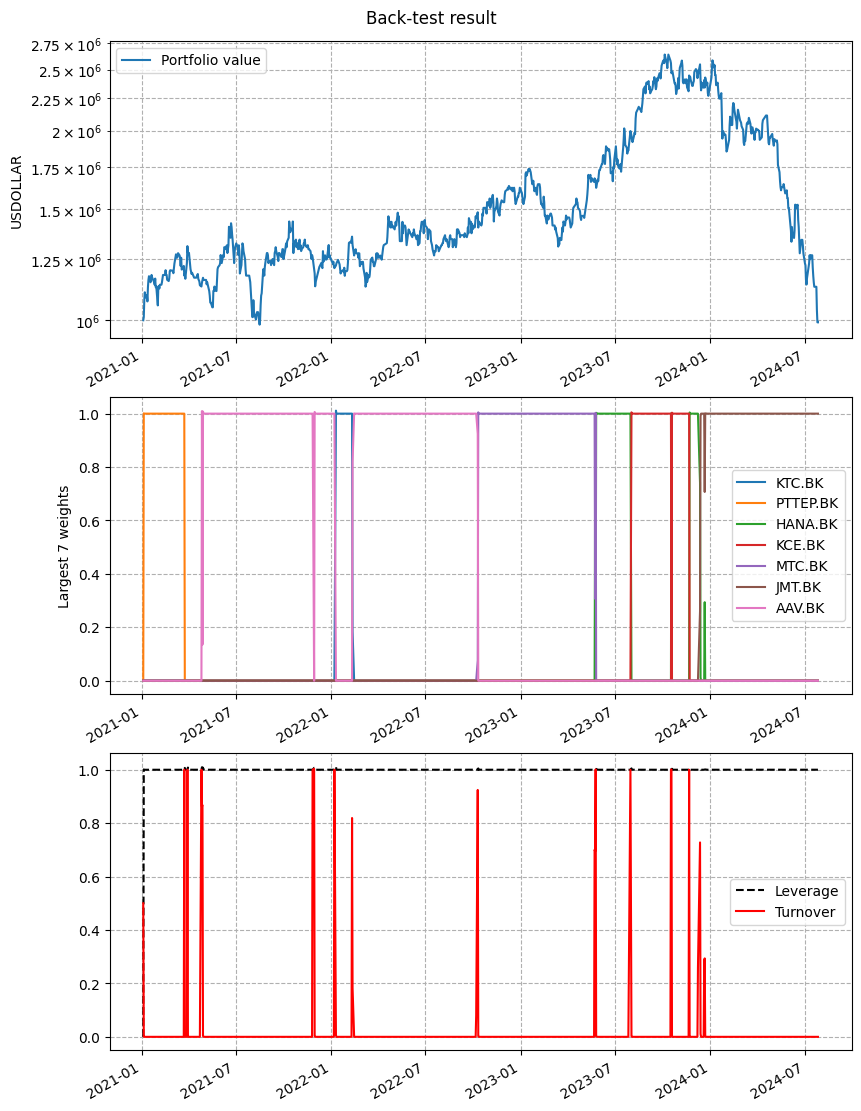

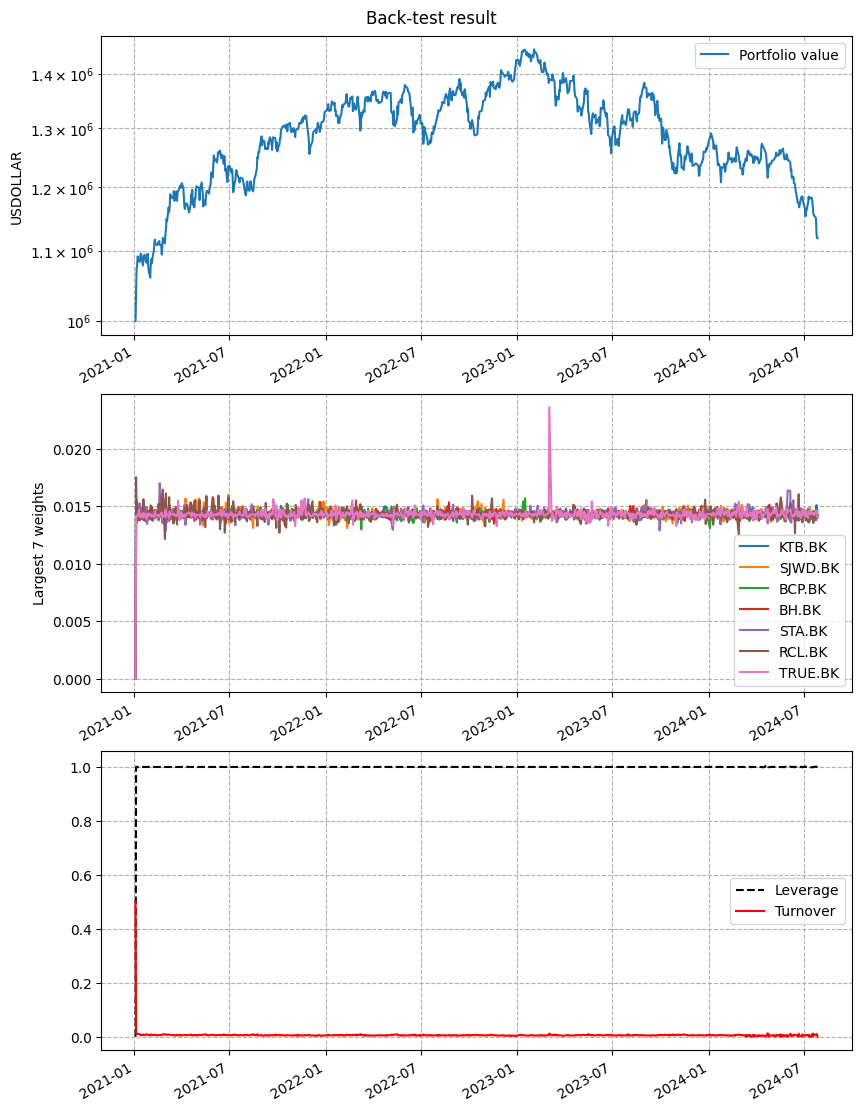

In [8]:
GAMMA = 2.5

objective = cvx.ReturnsForecast(r_hat = costom_forecaster) - 2.5 * (
    cvx.FactorModelCovariance(num_factors = 10)
) - cvx.StocksTransactionCost()

constraints = [cvx.LeverageLimit(1), cvx.LongOnly(applies_to_cash=True)]
policy = cvx.MultiPeriodOptimization(objective, constraints, planning_horizon=5)
results = simulator.backtest_many([policy, cvx.Uniform()], start_time='2021-01-01', end_time = '2024-07-30')

print("\n# MULTI-PERIOD OPTIMIZATION\n")
print(results[0])
print("\n# UNIFORM ALLOCATION:\n")
print(results[1])

mpo_result = results[0].plot()

# # plot value and weights of the portfolio in time for uniform
uniform_figure = results[1].plot()

In [9]:
benchmark = simulator_test.backtest_many([cvx.Uniform()], start_time='2021-01-01', end_time = '2024-07-30')

Hedge with SET100 index

<Axes: title={'center': 'final strategy'}>

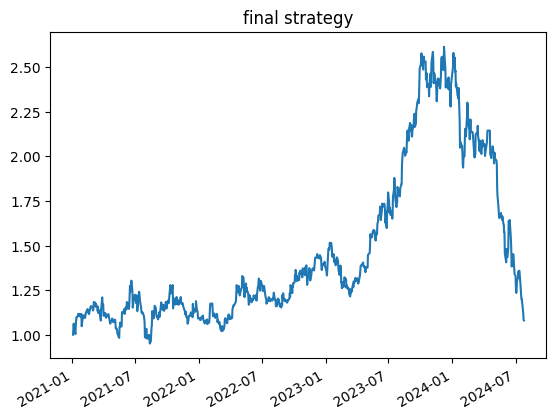

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

final = results[0].returns - benchmark[0].returns
cumulative_returns = (1+final).cumprod()
cumulative_returns.plot(title = 'final strategy')

In [11]:
portfolio_returns = final
index_returns = benchmark[0].returns

In [12]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# Assume `portfolio_returns` and `index_returns` are your dataframes with daily returns

# Calculate Sharpe Ratio
risk_free_rate = 1.018 ** (1/252) -1
excess_returns = portfolio_returns - risk_free_rate
sharpe_ratio = excess_returns.mean() / portfolio_returns.std() * np.sqrt(252)

# Calculate CAGR
total_return = (1 + portfolio_returns).prod() - 1
years = (portfolio_returns.index[-1] - portfolio_returns.index[0]).days / 365.25
cagr = (1 + total_return) ** (1 / years) - 1

# Calculate Max Drawdown
cumulative_returns = (1 + portfolio_returns).cumprod()
drawdown = cumulative_returns / cumulative_returns.cummax() - 1
max_drawdown = drawdown.min()


beta, alpha, _, _, _ = stats.linregress(index_returns, portfolio_returns)
annualized_alpha = alpha * 252


stats = {
    'Sharpe Ratio': sharpe_ratio,
    'CAGR': cagr,
    'Max Drawdown': max_drawdown,
    'Alpha': annualized_alpha,
    'Beta': beta
}
stats

{'Sharpe Ratio': 0.19755188347246752,
 'CAGR': 0.022152537076751022,
 'Max Drawdown': -0.586519496409772,
 'Alpha': 0.09538251127122234,
 'Beta': 0.5332237648558968}